<a href="https://colab.research.google.com/github/myungjinma/Python_Study/blob/main/0822_72%EC%9D%BC%EC%B0%A8_ML(%EB%8B%A4%EC%A4%91_%EC%86%90%EC%9E%A1%EC%9D%B4_%EB%B0%B4%EB%94%A7_%EB%AC%B8%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

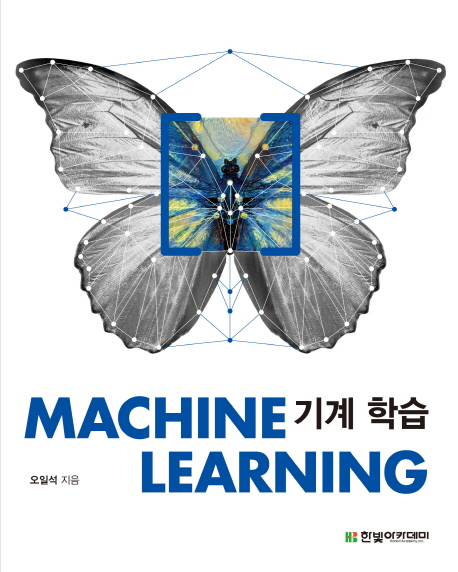

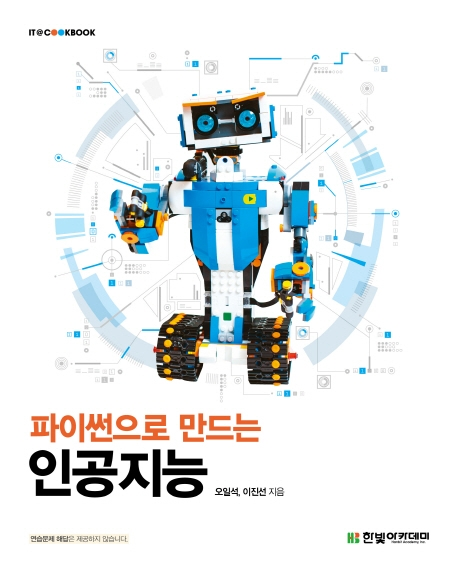

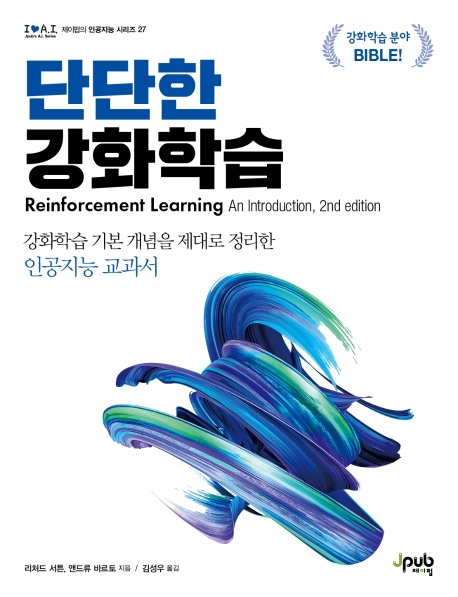

저 : 리처드 서튼 (Richard S. Sutton)

앨버타 대학교의 컴퓨터 과학과 교수이자 같은 대학에서 강화학습 및 인공지능 분과의 AITF(Alberta Innovates Technology Future) 의장을 맡고 있다. 또한, 딥마인드의 우수 과학자(Distinguished Research Scientist)이기도 하다.

저 : 앤드류 바르토 (Andrew G. Barto)
매사추세츠 대학교 애머스트 캠퍼스의 컴퓨터 및 정보과학 대학에서 명예 교수로 재직 중이다.

역 : 김성우 인공위성 제어에 지도학습을 적용한 연구로 박사학위를 받았다. 지금은 인공위성 개발 업체에서 위성 충돌 회피 및 위성 영상 분석을 위한 기계학습 방법을 연구하고 있다.

강화 학습(Reinforcement learning)은 기계 학습의 한 영역이다. 행동심리학에서 영감을 받았으며, 어떤 환경 안에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법이다.

In [2]:
import numpy as np

#다중 손잡이 밴딧 문제 설정
arms_profit = [0.4,0.12, 0.52, 0.6, 0.25] #플레이어에겐 비공개
n_arms = len(arms_profit)

n_trial = 10000         #손잡이를 당기는 횟수(에피소드 길이)

#손잡이 당기는 행위를 시뮬레이션하는 함수(handle은 손잡이 번호)

def pull_bandit(handle):
  q = np.random.random()
  if q<arms_profit[handle]:
    return 1
  else:
    return -1

In [3]:
pull_bandit(0)

1

In [4]:
def random_exploration():
  episode=[]
  num = np.zeros(n_arms)              #손잡이별로 당긴 횟수
  wins = np.zeros(n_arms)             #손잡이별로 승리 횟수
  for i in range(n_trial):
    h= np.random.randint(0, n_arms)   #0, 1, 2, 3, 4 중에서 하나 선택
    reward = pull_bandit(h)           #h =1, reward = 1, -1
    episode.append([h, reward])       #[(1, -1)]
    num[h]+=1 
    wins[h]+=1 if reward ==1 else 0
  return episode, (num,wins)

In [5]:
e, r = random_exploration()

In [6]:
r

(array([2034., 1979., 2002., 1993., 1992.]),
 array([ 833.,  225., 1039., 1224.,  493.]))

In [7]:
print('손잡이별 승리 확률 :' , ["%6.4f"% (r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])

손잡이별 승리 확률 : ['0.4095', '0.1137', '0.5190', '0.6141', '0.2475']


In [8]:
print('손잡이별 수익($):' , ['%d'% (2*r[1][i] - r[0][i])for i in range(n_arms)])

손잡이별 수익($): ['-368', '-1529', '76', '455', '-1006']


In [9]:
-39-161-15+54-119

-280

In [10]:
print('순 수익 ($):', sum(np.asarray(e)[:,1]))

순 수익 ($): -2372


In [11]:
def epsilon_greedy(eps):
  episode = []
  num= np.zeros(n_arms)
  wins = np.zeros(n_arms)
  for i in range(n_trial):
    r = np.random.random()
    if(r<eps or sum(wins) == 0): 
      h = np.random.randint(0,n_arms)
    else:
      prob=np.array([wins[i]/num[i] if  num[i]>0 else 0.0 for i in range(n_arms)])
      prob = prob/sum(prob)
      h = np.random.choice(range(n_arms), p= prob)
    reward = pull_bandit(h)
    episode.append([h, reward])
    num[h]+=1
    wins[h]+=1 if reward == 1 else 0
  return episode, (num, wins)

eps : 탐험형 - 무작위로 선택하여 손잡이를 당긴다.

1-eps : 탐사형 - 현재의 보상값을 고려하여 가장 높은 보상값인 손잡이를 선택한다.

In [12]:
e, r = epsilon_greedy(0.1)

In [13]:
np.random.choice([1,2,3,4,5])

5

In [14]:
np.random.choice(range(n_arms))

4

[11, 2, 4] => [11/(11+2+4), 2/(11+2+4), 4/(11+2+4)]

In [15]:
p=[0.6, 0.4, 0.0]
np.random.choice([1,20,3], 16, p=p) # P의 전체합이 항상 1, 개수가 맞아야 함

array([20,  1,  1, 20,  1,  1,  1,  1, 20,  1,  1,  1,  1, 20,  1,  1])

In [16]:
print("손잡이별 승리 확률:", ["%6.4f"% (r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
print("손잡이별 수익($):",["%d"% (2*r[1][i]-r[0][i]) for i in range(n_arms)])

손잡이별 승리 확률: ['0.3907', '0.1169', '0.5291', '0.6071', '0.2441']
손잡이별 수익($): ['-456', '-557', '158', '660', '-713']


In [17]:
print("순 수익($):",sum(np.asarray(e)[:,1]))

순 수익($): -908
